# Group 5 Assignement 2 - Diabetes Machine Learning Model


The purpose of this report is to observe if diabetes can be reliably predicted by measuring other factors and determining 
if these are accurate indicators of a person developing diabetes. 
All patients in the following report are women of Pima Indian ethnicity aged 21 or over. Thus we can narrow down the causal factors of diabetes with more certainty, however the trade off to this is, we must also bear in mind that
our entire dataset could be skewed if it were found that Pima Indian women were more pre-disposed to developing diabetes than the "average" person

In [93]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
import scipy.stats as stats
import seaborn as sb
from numpy import nan as NA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#Loading our raw data as "data_raw"
data_raw = pd.read_csv('diabetes.csv') 

pd.set_option("display.max.rows", None)

data_raw

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Cleaning the Data

In [2]:
#Checking the data type of each column
data_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
data_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


At first glance let's see how many of the patients in our dataset are diabetic since we won't be cleaning the outcome     column

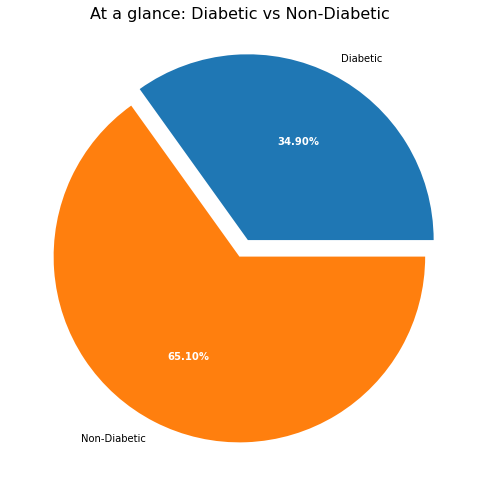

Out of 768 subjects, 268 have diabetes, and 500 do not


In [5]:
#Assign outcome to its own variable
outcome = data_raw[data_raw.columns[-1]]

#There are 768 total entries in the data. This is observable from the data.csv file or returned using the next line of code 
Total = data_raw[data_raw.columns[0]].count()

#To find out how many of the patients are diabetic we will count all the entries that return 1 in outcome, and assign it to "diabetic"
Diabetic = len(outcome[outcome == 1].index)

#And we will do the same for the non-diabetic population
Non_diabetic = len(outcome[outcome == 0].index)

#Plot the data
#First we'll create an array with our aggregated data sets and labels
y = np.array([Diabetic, Non_diabetic])
labels= ['Diabetic','Non-Diabetic']

#Setting size of the pie chart  
fig, ax = plt.subplots(figsize=(7, 7))

#Displaying representations by percent, assigning labels
patches, texts, pcts = ax.pie(y, autopct='%.2f%%', labels=labels, explode = [0.1, 0])

#Title of Chart
ax.set_title('At a glance: Diabetic vs Non-Diabetic', fontsize = 16)

#Setting the font colour and style
plt.setp(pcts, color='white', fontweight='bold')

#Plotting the pie chart
plt.tight_layout()

#This ensures the printed text will follow the pie chart
plt.show()
print(f"Out of {Total} subjects, {Diabetic} have diabetes, and {Non_diabetic} do not")


### Cleaning the data and checking for errors
Checking for NaN values

In [6]:
data_raw.isnull().sum(axis = 0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No NaN values present

Now we will go through the raw data and find all data points that are separated from the median by 3 or more standard 
deviations on both sides


In [7]:
data_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
zscores = stats.zscore(data_raw, axis=0)
zscores.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


Now we will find all zscores > 3 or < -3. These scores will correspond to outliers in the raw_data
that will need to be substituted.


In [9]:
outliers = zscores[(zscores > 3) | (zscores < -3)]
outliers_pregnancies = outliers['Pregnancies'].dropna(how='all')
outliers_pregnancies

88     3.312645
159    3.906578
298    3.015679
455    3.015679
Name: Pregnancies, dtype: float64

The outliers in the pregnancies column are in row 88, 159, 298, and 455. We will remove these datapoints for now and substitute the mean for them later

In [10]:
#Extracting the pregnancies column from the raw data
pregnancies_cleaned = data_raw['Pregnancies']

#Dropping/assigning NaN to the outliers
for i in outliers_pregnancies.index:
    pregnancies_cleaned = pregnancies_cleaned.drop([i]) 

And we will do the same for the remaining columns

In [11]:
#Extracting the glucose outliers from the outliers table
outliers_glucose = outliers['Glucose'].dropna(how='all')
outliers_glucose


75    -3.783654
182   -3.783654
342   -3.783654
349   -3.783654
502   -3.783654
Name: Glucose, dtype: float64

The outliers in the glucose column are in row 75, 182, 342, 349, and 502. We will remove these datapoints as well

In [12]:
#Extracting the glucose column from the raw database
glucose_cleaned = data_raw['Glucose']

#Dropping/assigning NaN to the outliers
for i in outliers_glucose.index:
    glucose_cleaned = glucose_cleaned.drop([i]) 

In [13]:
#Extracting the bloodpressure outliers from the outliers table
outliers_bloodpressure = outliers['BloodPressure'].dropna(how='all') 
outliers_bloodpressure

7     -3.572597
15    -3.572597
49    -3.572597
60    -3.572597
78    -3.572597
81    -3.572597
172   -3.572597
193   -3.572597
222   -3.572597
261   -3.572597
266   -3.572597
269   -3.572597
300   -3.572597
332   -3.572597
336   -3.572597
347   -3.572597
357   -3.572597
426   -3.572597
430   -3.572597
435   -3.572597
453   -3.572597
468   -3.572597
484   -3.572597
494   -3.572597
522   -3.572597
533   -3.572597
535   -3.572597
589   -3.572597
601   -3.572597
604   -3.572597
619   -3.572597
643   -3.572597
697   -3.572597
703   -3.572597
706   -3.572597
Name: BloodPressure, dtype: float64

In [14]:
#Extracting bloodpressue and assigning to variable
bloodpressure_cleaned = data_raw['BloodPressure']

#Dropping/assigning NaN to the outliers
for i in outliers_bloodpressure.index:
    bloodpressure_cleaned = bloodpressure_cleaned.drop([i]) 

In [15]:
#Extracting the skin thickness outliers from the outliers table
outliers_skinthickness = outliers['SkinThickness'].dropna(how='all')
outliers_skinthickness

579    4.921866
Name: SkinThickness, dtype: float64

In [16]:
#Extracting the skin thickness column from the raw database
skinthickness_cleaned = data_raw['SkinThickness'] 

#Dropping/assigning NaN to the outliers
skinthickness_cleaned = skinthickness_cleaned.drop([579]) 

In [17]:
#Extracting the insulin outliers  from the outliers database
outliers_insulin = outliers['Insulin'].dropna(how='all')
outliers_insulin

8      4.021922
13     6.652839
111    3.605143
153    3.518314
186    3.605143
220    3.457534
228    5.767184
247    5.211479
286    4.039288
370    3.344656
409    4.334506
415    3.422802
486    3.474899
584    4.516847
645    3.127584
655    3.995873
695    3.474899
753    3.735386
Name: Insulin, dtype: float64

In [18]:
#Extracting the insulin column from the raw database
insulin_cleaned = data_raw['Insulin'] 

#Dropping/assigning NaN to the outliers
for i in outliers_insulin.index:
    insulin_cleaned = insulin_cleaned.drop([i]) 

In [19]:
#Extracting the BMI outliers from the outliers database
outliers_bmi = outliers['BMI'].dropna(how='all')
outliers_bmi

9     -4.060474
49    -4.060474
60    -4.060474
81    -4.060474
145   -4.060474
177    4.455807
371   -4.060474
426   -4.060474
445    3.478529
494   -4.060474
522   -4.060474
673    3.211999
684   -4.060474
706   -4.060474
Name: BMI, dtype: float64

In [20]:
#Extracting the BMI column from the raw database
bmi_cleaned = data_raw['BMI'] 

#Dropping/assigning NaN to the outliers
for i in outliers_bmi.index:
    bmi_cleaned = bmi_cleaned.drop([i]) 

In [21]:
#Extracting the pedigree outliers from the outliers database
outliers_pedigree = outliers['DiabetesPedigreeFunction'].dropna(how='all')
outliers_pedigree

4      5.484909
45     4.291962
58     3.953709
228    5.608734
330    3.032573
370    5.028871
371    3.802703
395    3.407067
445    5.883565
593    3.706059
621    3.703039
Name: DiabetesPedigreeFunction, dtype: float64

In [22]:
#Extracting the pedigree column from the raw database
pedigree_cleaned = data_raw['DiabetesPedigreeFunction'] 

#Dropping/assigning NaN to the outliers
for i in outliers_pedigree.index:
    pedigree_cleaned = pedigree_cleaned.drop([i]) 

In [23]:
#Extracting the age outliers from the outliers database
outliers_age = outliers['Age'].dropna(how='all')
outliers_age

123    3.042663
453    3.297926
459    4.063716
666    3.127750
684    3.042663
Name: Age, dtype: float64

In [24]:
#Extracting the Age column from the raw database
age_cleaned = data_raw['Age'] 

#Dropping/assigning NaN to the outliers
for i in outliers_age.index:
    age_cleaned = age_cleaned.drop([i]) 

In [25]:
#Now we will bind all the cleaned columns into a new database
data_clean = pd.concat([pregnancies_cleaned,glucose_cleaned,bloodpressure_cleaned,skinthickness_cleaned,insulin_cleaned,bmi_cleaned, pedigree_cleaned, age_cleaned, data_raw['Outcome']], axis=1)
data_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0,1


Now we will remove all values from each column where 0 is not possible. For example in skin thickness but not pregnancies

In [26]:
data_clean_copy = data_clean.copy(deep = True)
data_clean_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'Age']] = data_clean_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'Age']].replace(0,np.nan)
#pedigree functions and pregnancies can be 0 ((only use outlier detection))

print(data_clean_copy.isnull().sum())

Pregnancies                   4
Glucose                       5
BloodPressure                35
SkinThickness               228
Insulin                     392
BMI                          14
DiabetesPedigreeFunction     11
Age                           5
Outcome                       0
dtype: int64


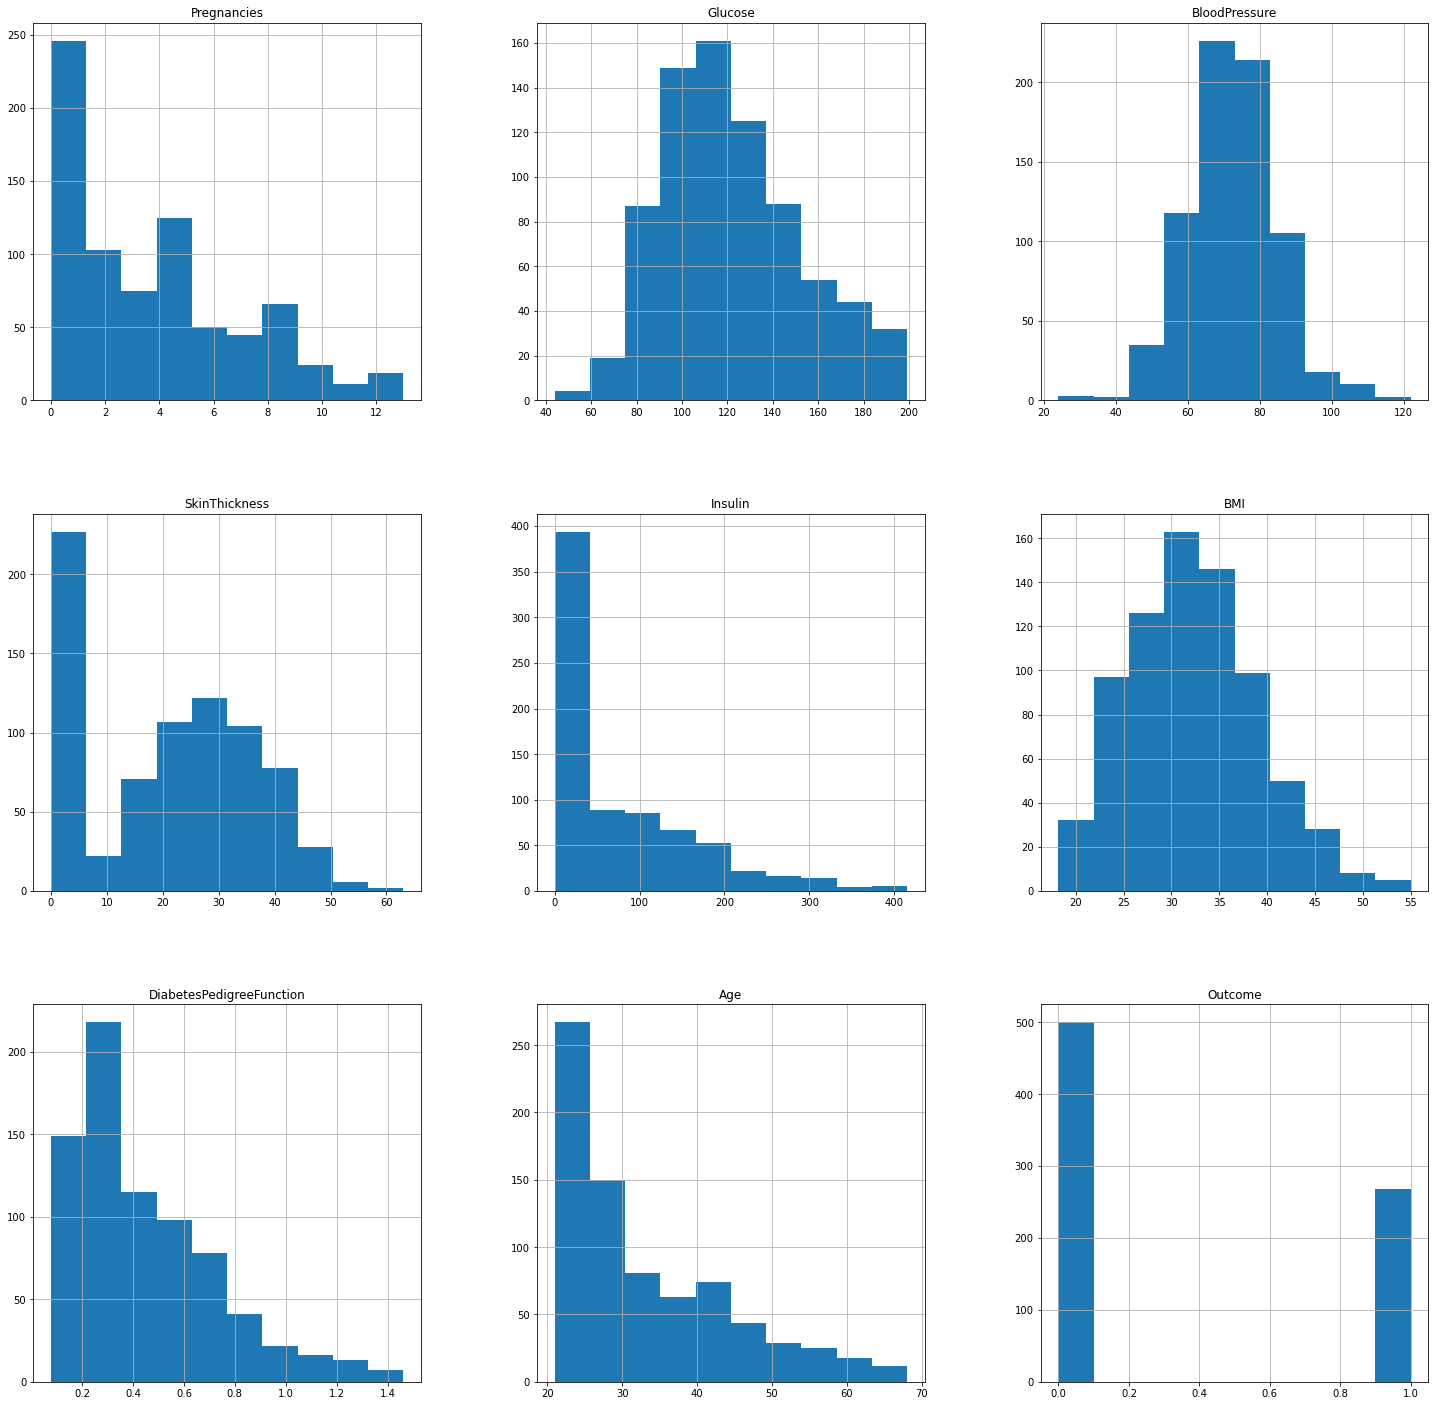

In [27]:
p = data_clean.hist(figsize = (25,25))

In [28]:
## https://www.scribbr.com/frequently-asked-questions/whats-the-best-measure-of-central-tendency-to-use/

data_clean_copy['Pregnancies'].fillna(data_clean_copy['Pregnancies'].median(), inplace = True)
    
data_clean_copy['Glucose'].fillna(data_clean_copy['Glucose'].mean(), inplace = True)

data_clean_copy['BloodPressure'].fillna(data_clean_copy['BloodPressure'].mean(), inplace = True)

data_clean_copy['SkinThickness'].fillna(data_clean_copy['SkinThickness'].median(), inplace = True)

data_clean_copy['Insulin'].fillna(data_clean_copy['Insulin'].median(), inplace = True)

data_clean_copy['BMI'].fillna(data_clean_copy['BMI'].median(), inplace = True)

data_clean_copy['DiabetesPedigreeFunction'].fillna(data_clean_copy['DiabetesPedigreeFunction'].median(), inplace = True)

data_clean_copy['Age'].fillna(data_clean_copy['Age'].median(), inplace = True)

In [29]:
data_clean_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,120.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,120.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,120.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,0.366,33.0,1


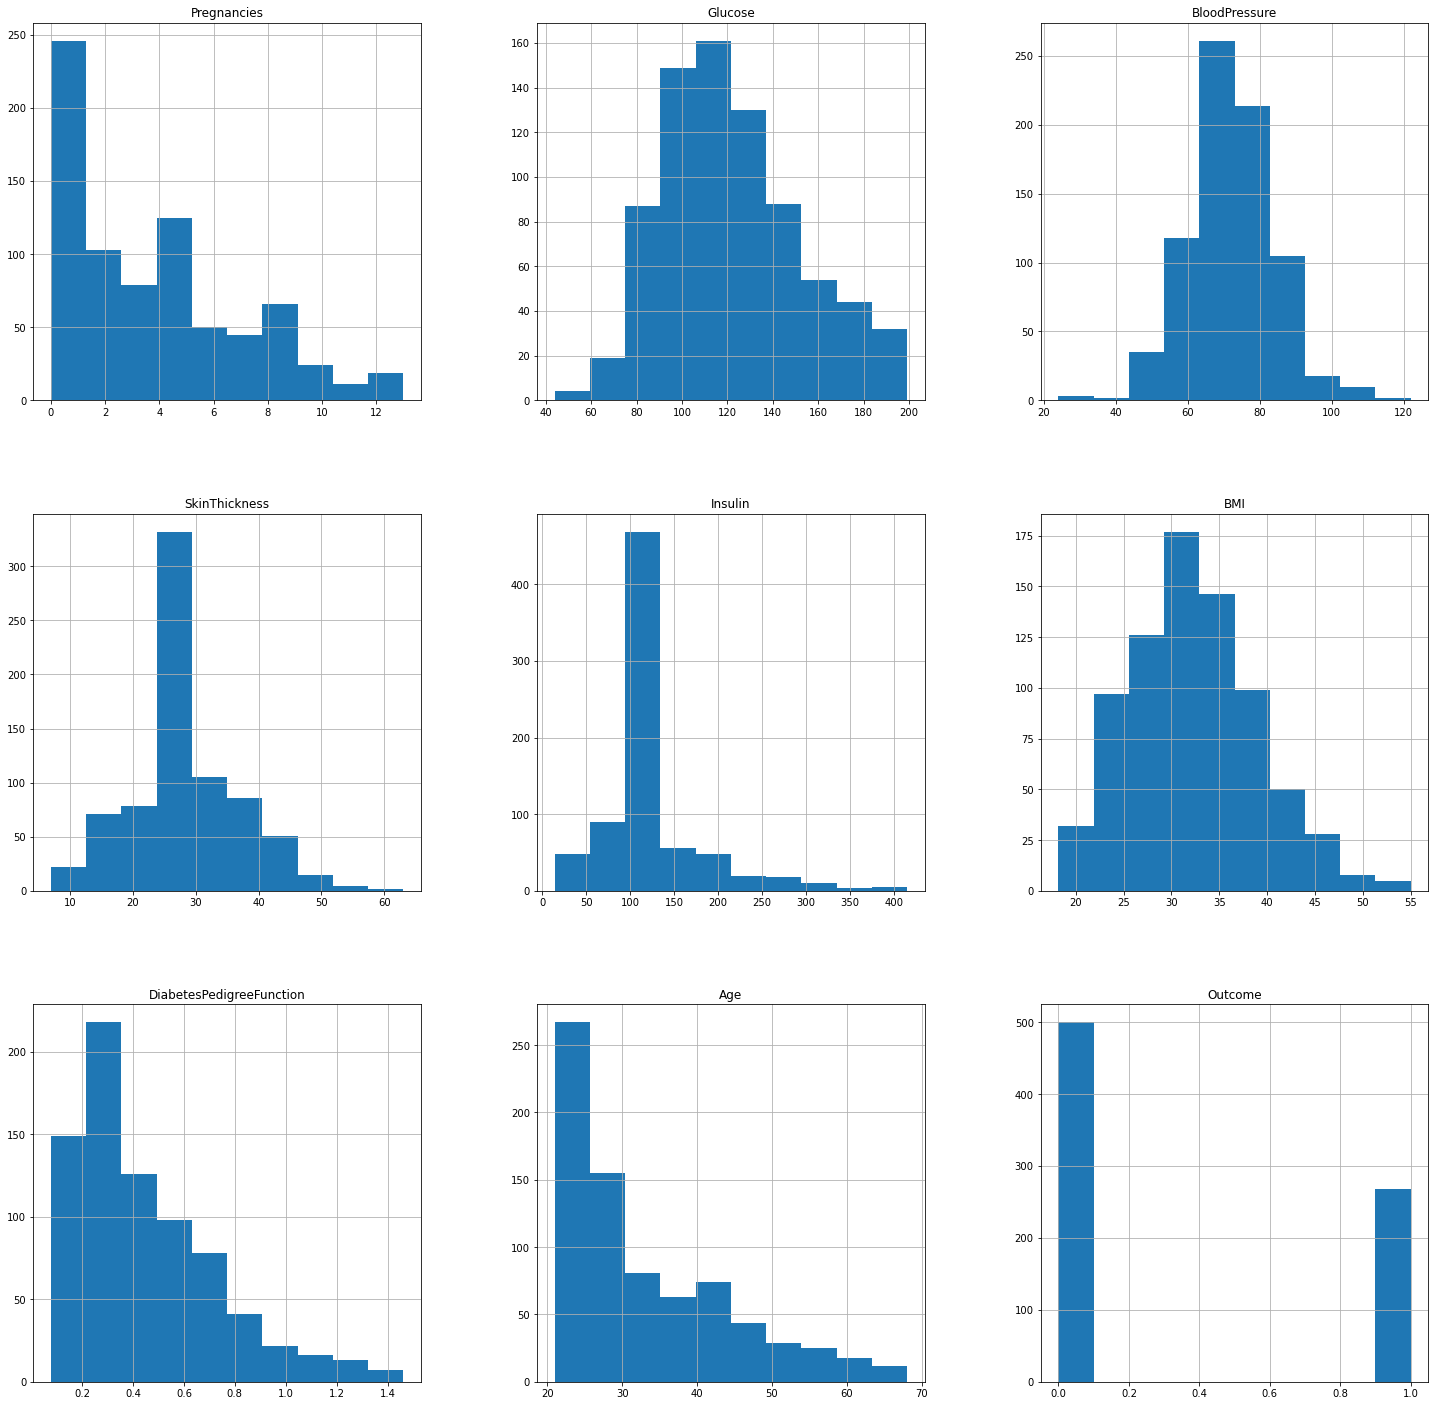

In [96]:
nan_metric_plot = data_clean_copy.hist(figsize = (25,25))

## Comparing the clean and original dataset

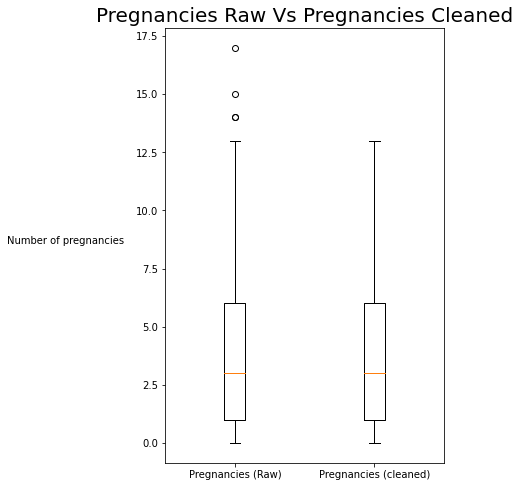

In [31]:
#Setting the size of the boxplot
plt.figure(figsize=(5,8))

#Creating an array. Non diabetic and diabetic sample. 
x = [data_raw[data_raw.columns[0]], data_clean_copy[data_clean_copy.columns[0]]]

#Plotting the array
plt.boxplot(x)

#Labelling the axes
plt.ylabel(')', rotation = 0, labelpad=70)
plt.xticks([1,2], ['Pregnancies (Raw)', 'Pregnancies (cleaned)'])
plt.ylabel('Number of pregnancies', rotation = 0, labelpad=70)

plt.title("Pregnancies Raw Vs Pregnancies Cleaned", fontsize=20)

plt.show()

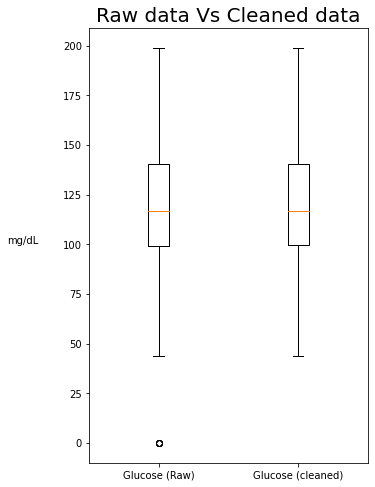

In [32]:
plt.figure(figsize=(5,8))

#Creating an array. Non diabetic and diabetic sample. 
x=[data_raw[data_raw.columns[1]], data_clean_copy[data_clean_copy.columns[1]]]

#Plotting the array
plt.boxplot(x)

#Labelling the axes
plt.ylabel('mg/dL', rotation = 0, labelpad=40)
plt.xticks([1,2,], ['Glucose (Raw)', 'Glucose (cleaned)'])

plt.title("Raw data Vs Cleaned data", fontsize=20)

plt.show()

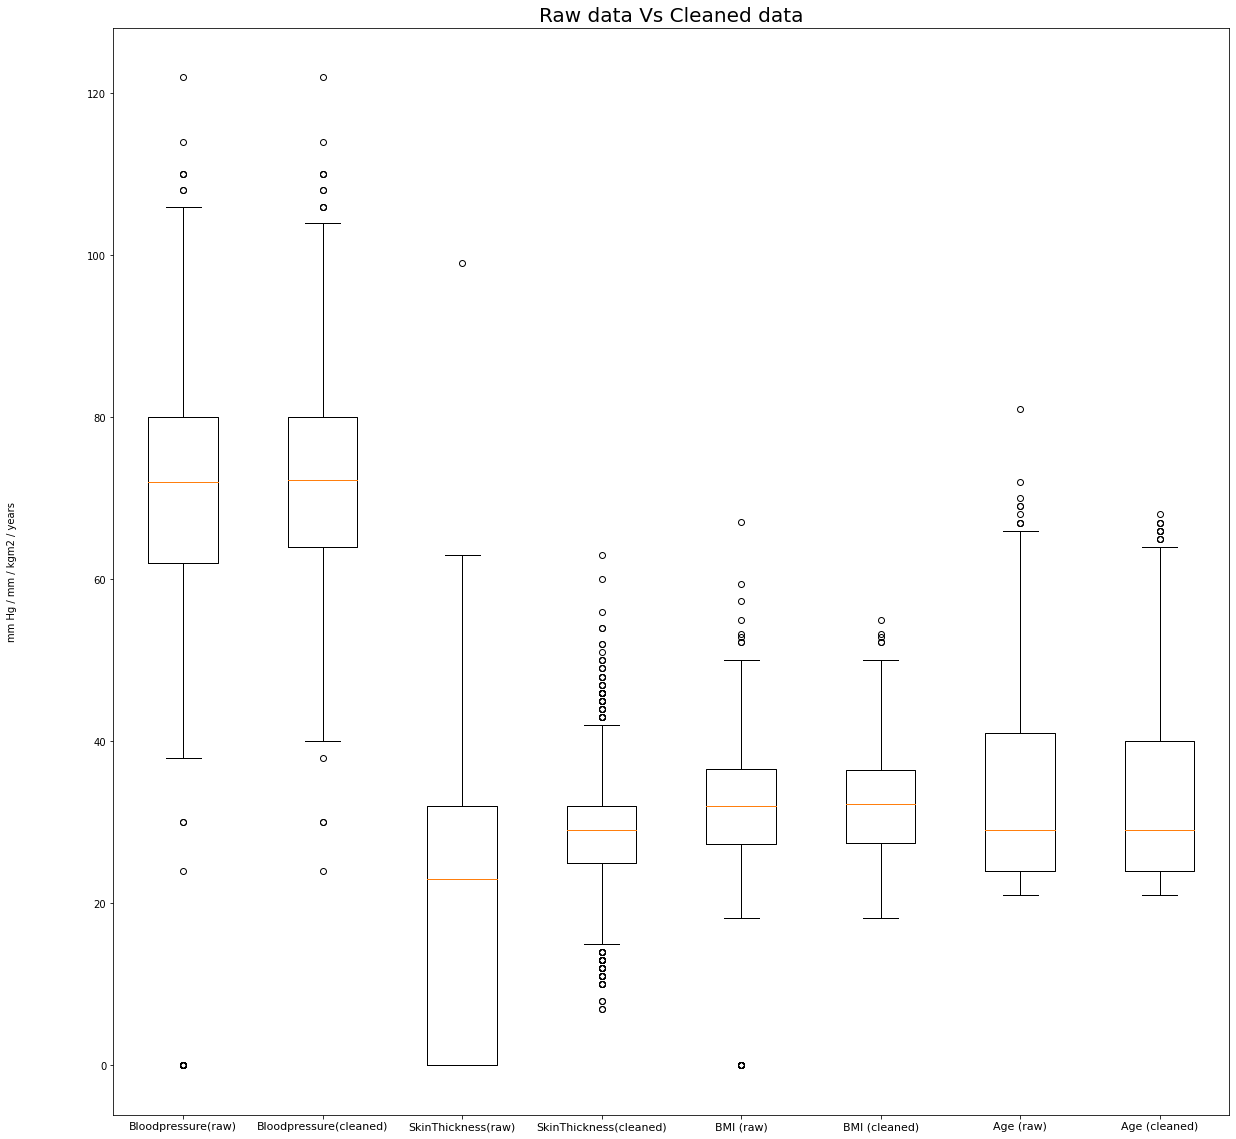

In [33]:
plt.figure(figsize=(20,20))

#Creating an array. Non diabetic and diabetic sample. 
x=[data_raw[data_raw.columns[2]], data_clean_copy[data_clean_copy.columns[2]],data_raw[data_raw.columns[3]], data_clean_copy[data_clean_copy.columns[3]], data_raw[data_raw.columns[5]], data_clean_copy[data_clean_copy.columns[5]],data_raw[data_raw.columns[7]], data_clean_copy[data_clean_copy.columns[7]]]

#Plotting the array
plt.boxplot(x)

#Labelling the axes
plt.ylabel('mm Hg / mm / kgm2 / years', rotation = 90, labelpad=70)
plt.xticks([1,2,3,4,5,6,7,8], ['Bloodpressure(raw)', 'Bloodpressure(cleaned)', 'SkinThickness(raw)', 'SkinThickness(cleaned)', 'BMI (raw)', 'BMI (cleaned)', 'Age (raw)', 'Age (cleaned)'], fontsize=11)

plt.title("Raw data Vs Cleaned data", fontsize=20)

plt.show()

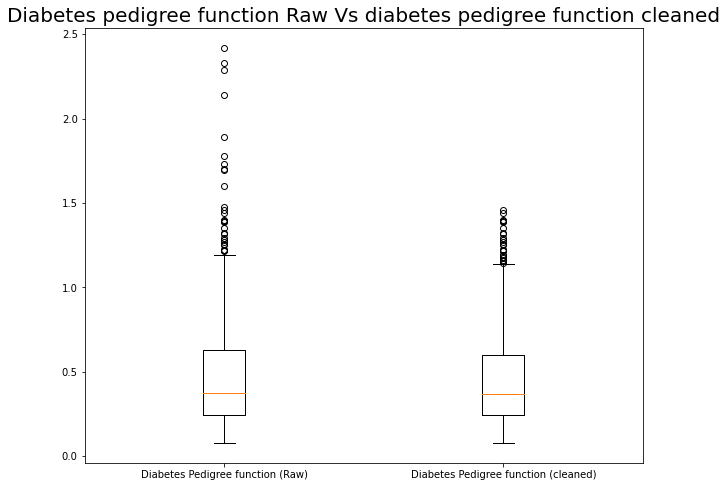

In [34]:
#Setting size of figure
plt.figure(figsize=(10,8))

#Assigning data to be plotted
x=[data_raw[data_raw.columns[6]], data_clean_copy[data_clean_copy.columns[6]]] 

#Plotting the array
plt.boxplot(x)

#Labelling the axes
plt.ylabel('', rotation = 0, labelpad=40)
plt.xticks([1,2,], ['Diabetes Pedigree function (Raw)', 'Diabetes Pedigree function (cleaned)']) 

#Title of the Plot
plt.title("Diabetes pedigree function Raw Vs diabetes pedigree function cleaned", fontsize=20)

plt.show()

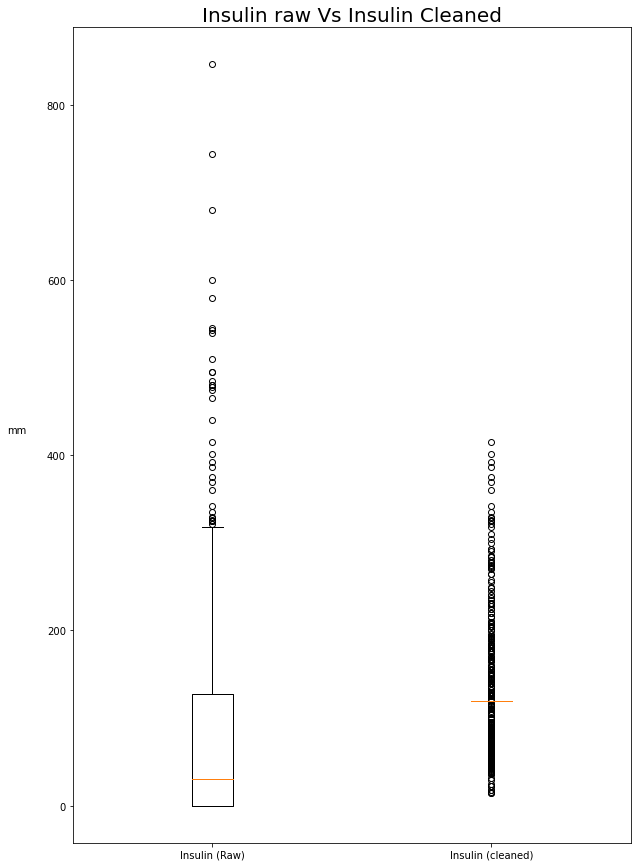

In [35]:
plt.figure(figsize=(10,15))

#Creating an array. Non diabetic and diabetic sample. 
x = [data_raw[data_raw.columns[4]], data_clean_copy[data_clean_copy.columns[4]]]

#Plotting the array
plt.boxplot(x)

#Labelling the axes
plt.ylabel('mm', rotation = 0, labelpad=30)
plt.xticks([1,2,], ['Insulin (Raw)', 'Insulin (cleaned)'])

plt.title("Insulin raw Vs Insulin Cleaned", fontsize=20)

plt.show()

In our study, we defined outliers as having a zscore of +3 or more, or -3 or less. The box plot shows outliers as any point outside of the upper and lower bounds of the box. We are not considering points above or below the upper and lower bounds as outliers. It is also worth noting that when the data is cleaned the upper and lower bounds are susceptible to contract, and thereby expose the underlying data points as outliers that were formerly within the bounds. After cleaning, some of the respective means of each column shifted.

In [36]:
# Shape of original Data
data_clean.shape

(768, 9)

In [37]:
#Shape of imputed NAN Data
data_clean_copy.shape

(768, 9)

Displaying we have not added or removed any rows from the dataset

In [38]:
data_clean_copy.dtypes.value_counts()

float64    8
int64      1
dtype: int64

In [39]:
db = data_clean.dtypes
dbimp = data_clean_copy.dtypes
print("Raw")
print(db.to_string())

print("\nImputed")
print(dbimp.to_string())

Raw
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64

Imputed
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64


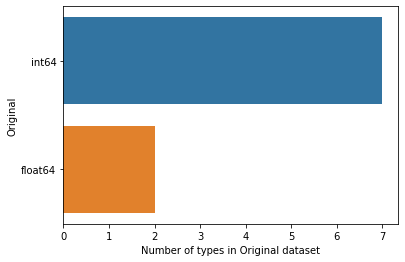

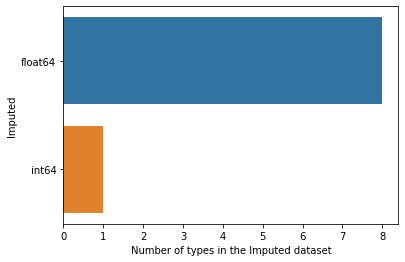

In [40]:
sb.countplot(y=data_raw.dtypes.map(str))
plt.xlabel("Number of types in Original dataset")
plt.ylabel("Original")
plt.show()

sb.countplot(y=data_clean_copy.dtypes.map(str))
plt.xlabel("Number of types in the Imputed dataset")
plt.ylabel("Imputed")
plt.show()

## Conversion of datatypes 

### Scatter Matrix using raw data

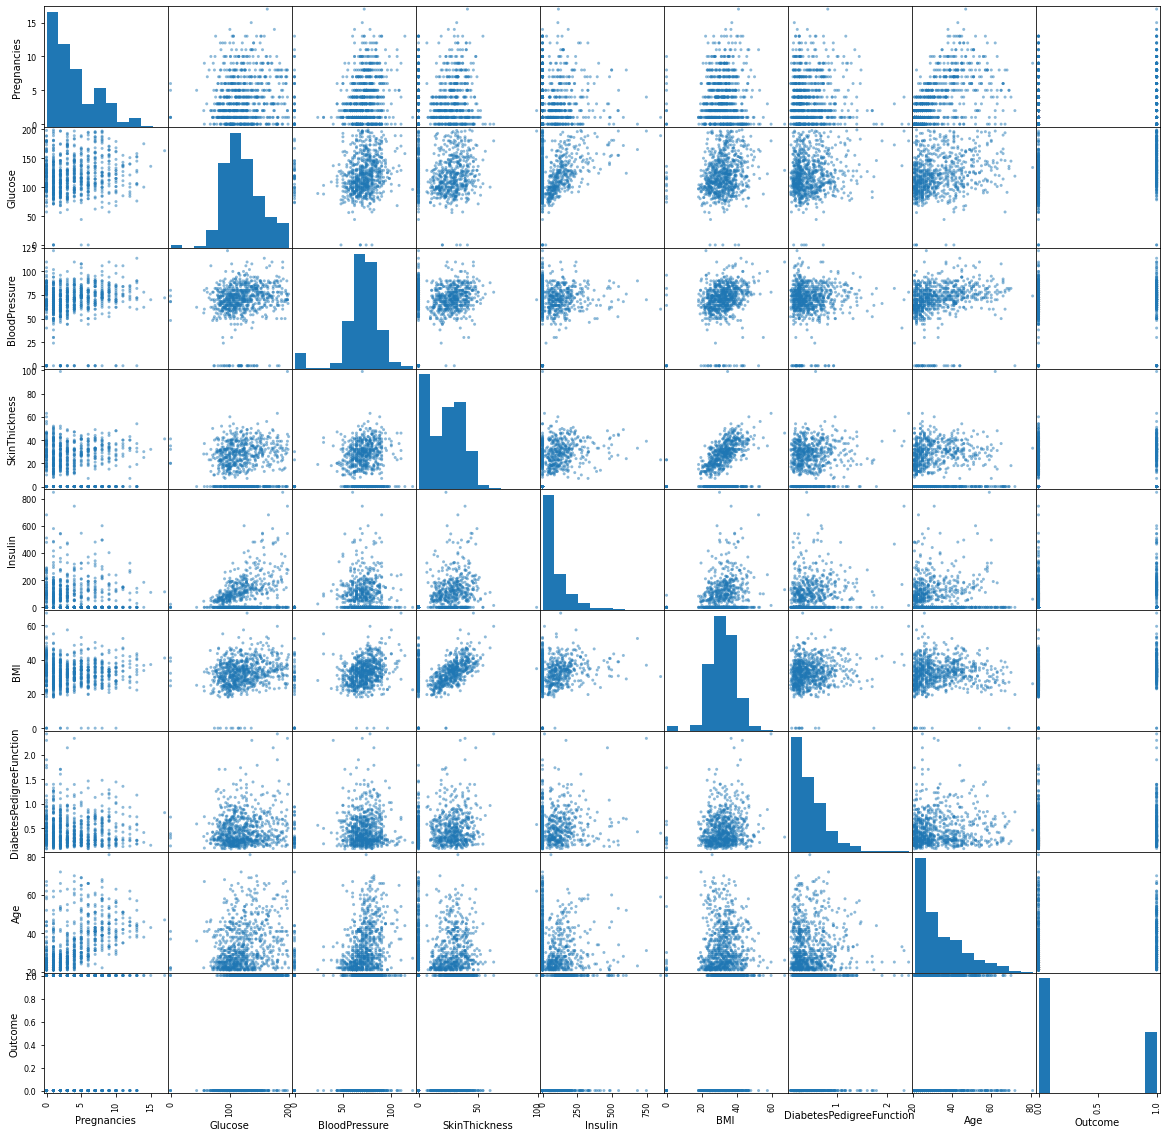

In [41]:
scatter_matrix = pd.plotting.scatter_matrix
pre_clean = scatter_matrix(data_raw,figsize=(20, 20))

Each plot in the matrix ensures that we understand the correlation between the corresponding pair of attributes. By looking at the different variables and visually comparing them, we can find correlations, such as pregnancies and age. Looking at both of their graphs down the horizonal we can see they are strongly correlated.

### Pair Plot using clean data

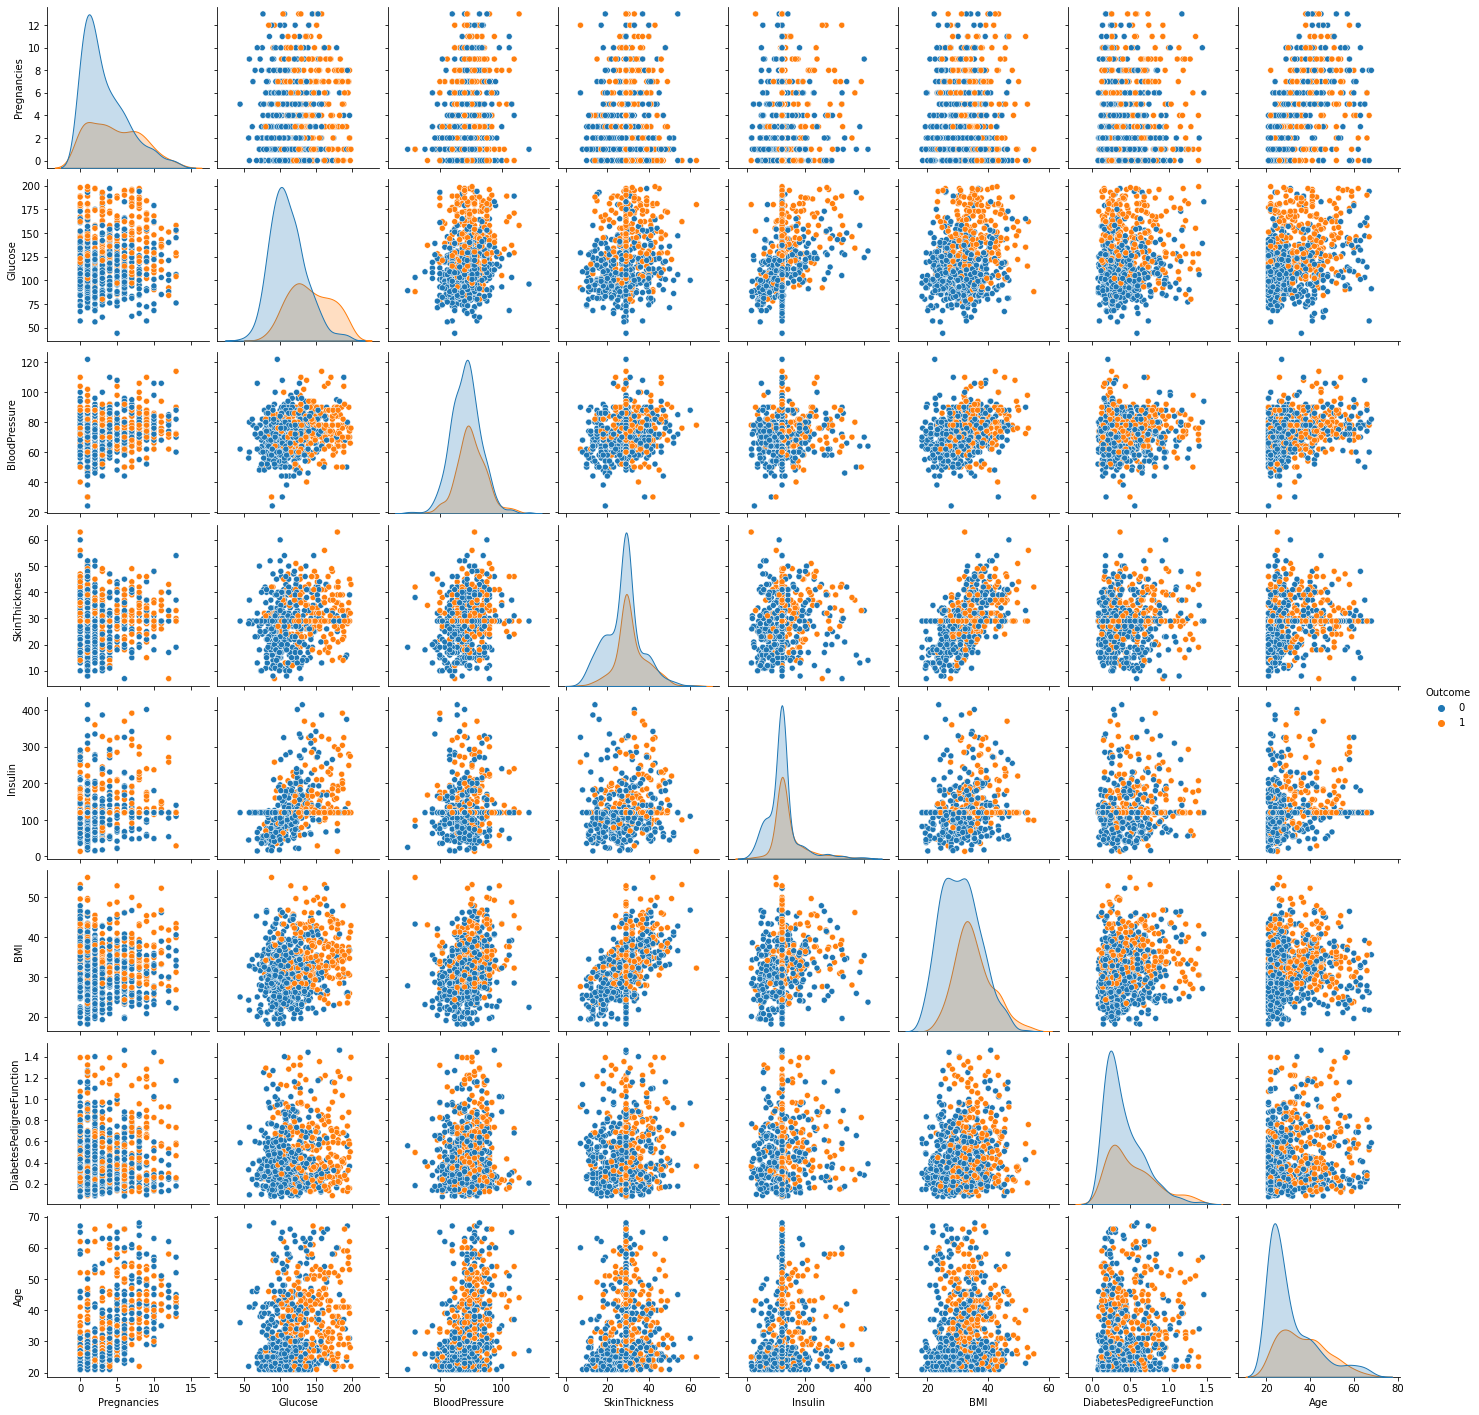

In [42]:
post_clean = sb.pairplot(data_clean_copy, hue = 'Outcome')

The pairs plot builds on two basic figures, the histogram and the scatter plot. 

The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower plots show the relationship (or lack thereof) between two variables. This is useful for us as we can compare all of the data before we clean it.

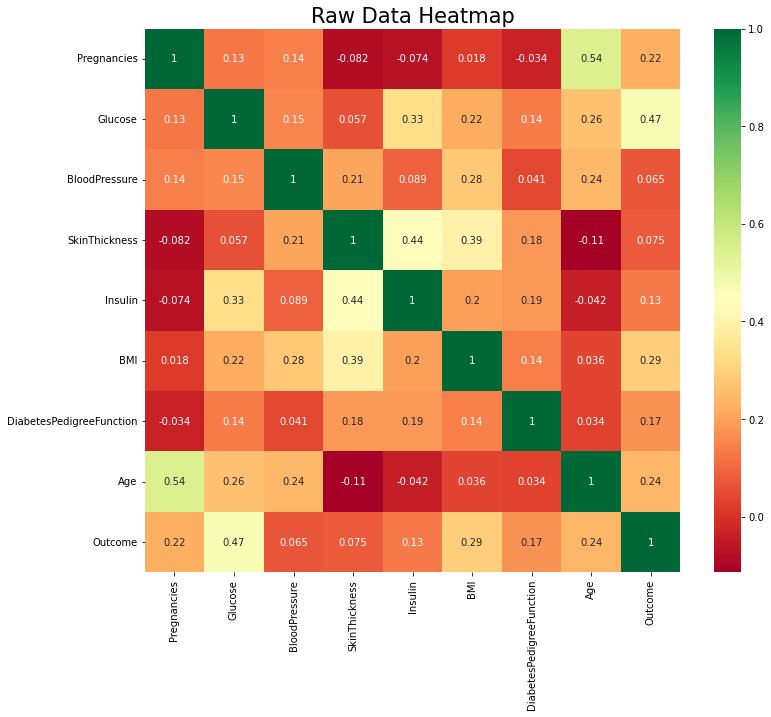

In [43]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
plt.title("Raw Data Heatmap", size=21)
heatmap = sb.heatmap(data_raw.corr(), annot=True,cmap ='RdYlGn')

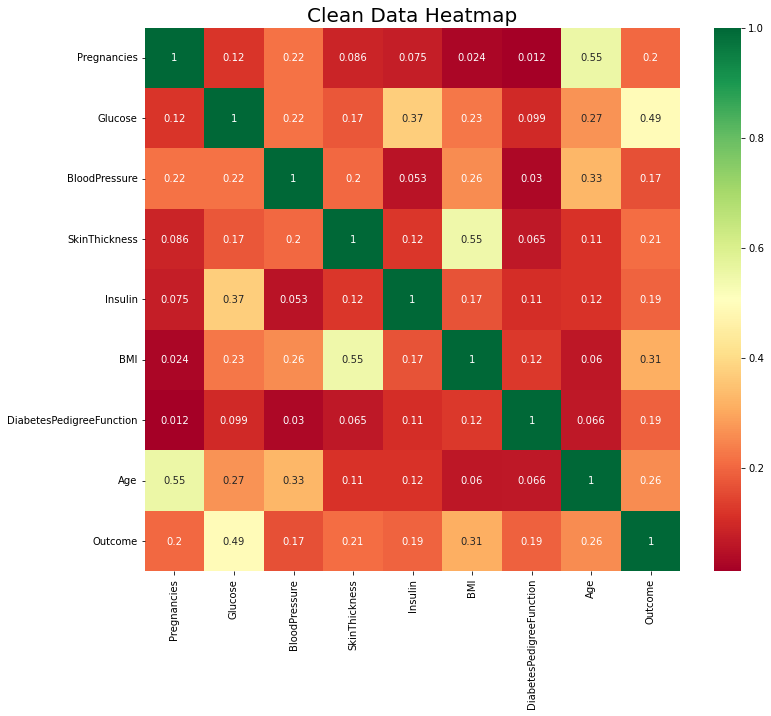

In [44]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
plt.title("Clean Data Heatmap", size=20)
p=sb.heatmap(data_clean_copy.corr(), annot=True,cmap ='RdYlGn')

# Principal Component Analysis (PCA)

Principal component analysis is a fast and flexible unsupervised method to reduce the data's dimensions. Its behavior is easiest to understand by looking at a 2D dataset.

The original data has 8 columns. In this section, the code projects the original data which is 8 dimensional into 2 dimensions.  The new components show the two main dimensions of variation.

So in the following cell we are removing the Outcome variable from the data, as we do not want to include the output in the fitting of PCA. After this we will run a standard scaler on the data. Then we will fit that data to the PCA.

In [45]:
features = list(data_raw.columns)

x = data_clean_copy.loc[:, features].values
y = data_clean_copy.loc[:,['Outcome']].values
x = StandardScaler().fit_transform(x)
 
pca = PCA(n_components=2)

We'll start the primary component analysis by separating the outcome (response) from the features, then running a standard scaler on the data. A Standard Scaler transforms the data in such a manner that it has mean of 0 and standard deviation of 1

In [46]:
principalComponents = pca.fit_transform(x)

principalComponents = pd.DataFrame(data=principalComponents,columns = ['principal component 1', 'principal component 2'])
display(principalComponents.head())

,principal component 1,principal component 2
0,2.022274,0.588834
1,-1.690609,-0.054149
2,1.111781,0.843046
3,-2.336960,-0.199464
4,0.543016,-2.225574


The above cell is fitting and transforming the standard scaled data. Which is then being merged into a dataframe with its two respective components.

Variance

In [47]:
print(pca.explained_variance_)

[2.61059891 1.44070995]


The above cell is displaying the variance of the two components, we have calculated above. Interpreting this, we can see that our lowest value is 1.44 and our highest value is 2.61.

In [48]:
cov_data = np.corrcoef(x.T)

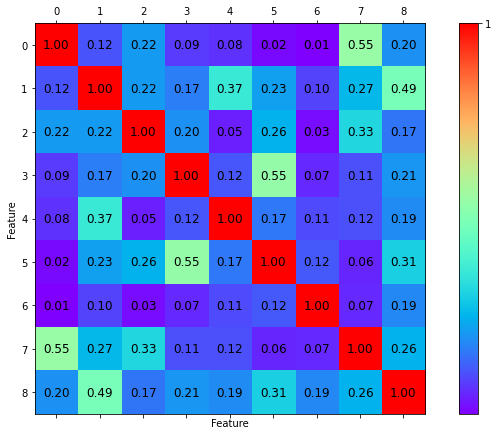

In [49]:
plt.figure(figsize=(12,7))

img = plt.matshow(cov_data, cmap=plt.cm.rainbow,fignum=1)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
plt.ylabel('Feature')
plt.xlabel('Feature')

for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

Observations


Interpreting the above heatmap, we can see each variable correlates with one another to different degrees. The diagonal, red line across the centre, is a result of each feature matching up with itself, hence yielding 100% correlation and should be disregarded. 
We can see that Pregnanices has a 55% correlation with Age and BMI has a 55% correlation with skin thickness. These correlations tend to lend some logic to the numbers. 

Age is a function of time and a child takes approximately 9 months of time to conceive. So a woman who has 8 pregnancies for example has to commit to approximately 6 years of pregnancy at a minimum to bear 8 children, in the mean time she is ageing. And so we can see the logical correlation between the two. Age tends to increase as Pregnancies increase.


Similarly a women's BMI will correlate with the skin thickness reading. The skin thickness test was developed to be able to gauge a person's healthy weight by seeing how much of their skin could be pinched between the thumb and forefinger. Women who are overweight (Higher BMI) tend to yield higher figures on the skin thickness test and vice versa for women who are underweight. Skin thickness reading tends to increase as BMI increases

Finally we can see the single factor that has the highest correlation with the outcome of diabetes is Blood Glucose, at 49%. This is in line with expectation as diabetes is defined as a condition arising when when blood sugar/glucose remains at an elevated level for prolonged periods of time (Healthline 2018:para 1)



In [50]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_data)

for i in range(len(eig_val_cov)):
  eigenvector_cov = eig_vec_cov[:, i].T
  print('\nEigenvector {}: \n{}'.format(i+1, eigenvector_cov))
  print('\nEigenvalue {}: {}'.format(i+1, eig_val_cov[i]))
  print(40*'-')

  print('Proportion of total variance', eig_val_cov/sum(eig_val_cov))


Eigenvector 1: 
[-0.28831857 -0.41220042 -0.32287002 -0.32993478 -0.26928135 -0.3611619
 -0.15781869 -0.36234973 -0.4179794 ]

Eigenvalue 1: 2.6071996902834105
----------------------------------------
Proportion of total variance [0.28968885 0.15987045 0.13006633 0.04328332 0.04561029 0.05438366
 0.10529435 0.08461218 0.08719057]

Eigenvector 2: 
[-0.56263678  0.06723965 -0.15292766  0.36188104  0.14485864  0.44444934
  0.15784106 -0.52522816  0.0726379 ]

Eigenvalue 2: 1.4388340223619578
----------------------------------------
Proportion of total variance [0.28968885 0.15987045 0.13006633 0.04328332 0.04561029 0.05438366
 0.10529435 0.08461218 0.08719057]

Eigenvector 3: 
[-0.12046514  0.39252282 -0.35953076 -0.45043178  0.47272664 -0.34081404
  0.30080895 -0.05853284  0.25637087]

Eigenvalue 3: 1.170596938664178
----------------------------------------
Proportion of total variance [0.28968885 0.15987045 0.13006633 0.04328332 0.04561029 0.05438366
 0.10529435 0.08461218 0.08719057]


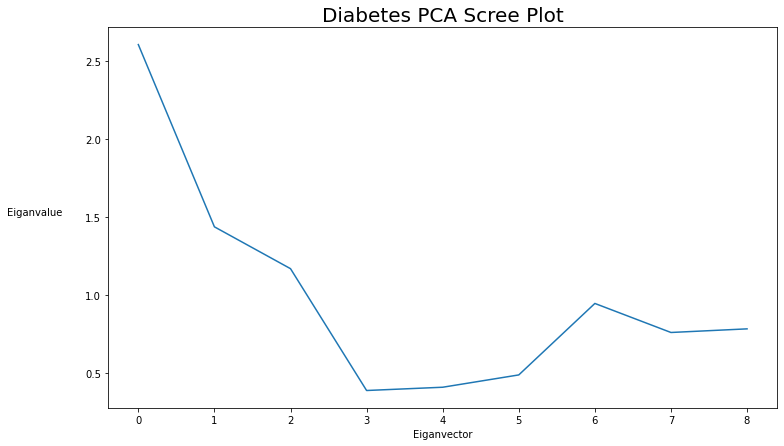

[2.60719969 1.43883402 1.17059694 0.3895499  0.41049265 0.48945297
 0.94764912 0.76150962 0.7847151 ]


In [51]:
plt.figure(figsize=(12,7))
plt.plot(eig_val_cov)
plt.title('Diabetes PCA Scree Plot', size=20)
plt.xlabel('Eiganvector')
plt.ylabel('Eiganvalue', rotation = 0, labelpad = 50)
plt.show()

print(eig_val_cov)

In [52]:
#Now we will append the outcome to the end of the dataframe to compare against. e.g if the person is diabetic or non-diabetic.
finalDf = pd.concat([principalComponents, data_clean_copy[['Outcome']]], axis = 1)
display(finalDf.head())

,principal component 1,principal component 2,Outcome
0,2.022274,0.588834,1
1,-1.690609,-0.054149,0
2,1.111781,0.843046,1
3,-2.336960,-0.199464,0
4,0.543016,-2.225574,1


We will now use a scatterplot to determine the groups within the data. There are two colours in this graph representing the 2 outcome possibilites (diabetic or non-diabetic)


In [53]:
data_clean_copy.corrwith(data_clean_copy['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.310640
Age                         0.255757
SkinThickness               0.209533
Pregnancies                 0.202492
Insulin                     0.193671
DiabetesPedigreeFunction    0.192880
BloodPressure               0.166074
dtype: float64

Correlation with other variables compared to the outcome variable, to display the highest corralated variable. Which is Glucose at 49.3%

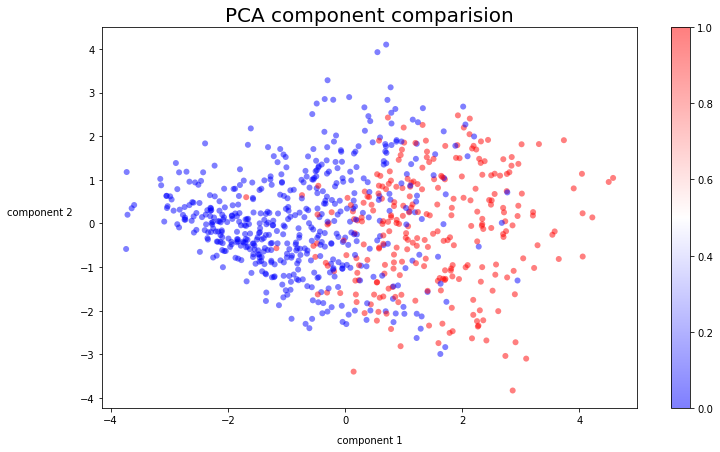

In [54]:
plt.figure(figsize=(12,7))
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'],
            c=finalDf['Outcome'], edgecolor='none', alpha=0.5,
            cmap='bwr')
plt.title('PCA component comparision', fontsize=20)
plt.xlabel('component 1', labelpad=10)
plt.ylabel('component 2', rotation = 0, labelpad = 40)
plt.colorbar();

Interpreting the scatterplot, we can see that the non-diabetic group (blue) tends to cluster where component 1 is negative and to a lesser effect where component 2 is negative. Conversely the diabetic group (red) shows a trend of occurring frequently when component 1 is positive, suggesting that component 1 is a major indicator of outcome. As this is an unsupervised learning environment, it shows that there is potential that a model could predict the outcome of diabetes from raw data accurately. Looking at the graph we can see it is clustered mostly together, which means both of the principle components are not the best way of reducing down the data set and creating clusters. We can although see that the grah is of a negative correlation.

Now we will plot the components versus the cumulative variance. This will tell us how much impact each of the factors has in the outcome

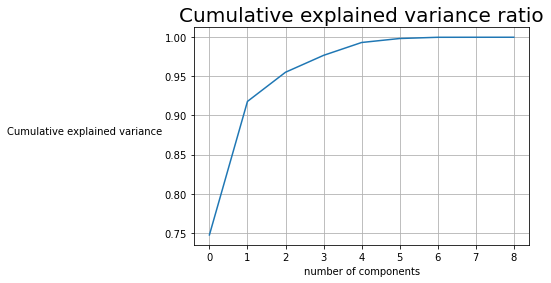

In [55]:
pca = PCA().fit(data_clean_copy)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative explained variance ratio', fontsize=20)
plt.xlabel('number of components')
plt.ylabel('Cumulative explained variance', rotation=0, labelpad=80);
plt.grid()

It is very striking that one component alone counts for about 92% of the multi-dimensional variance. Four only being of marginal significance and the last three components being completely redundant.

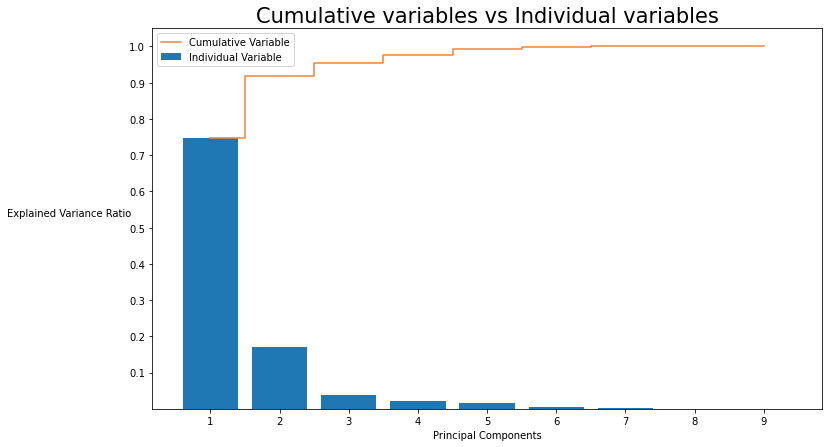

In [56]:
pca_evr = pca.explained_variance_ratio_
pca_evr_cum = np.cumsum( pca_evr )
x = np.arange( 1, len( pca_evr ) + 1 )
y = np.linspace( 0.1, 1, 10 )

plt.figure(figsize=(12,7))
plt.bar( x, pca_evr, alpha=1, align='center', label='Individual Variable' )
plt.step( x, pca_evr_cum, where='mid', label='Cumulative Variable', color=sb.colors.xkcd_rgb.get('dusty orange'))
plt.title("Cumulative variables vs Individual variables", size=21)
plt.ylabel('Explained Variance Ratio', labelpad=60, rotation=0 )
plt.xlabel('Principal Components')
plt.legend()
plt.xticks(x)
plt.yticks(y)
plt.show()

In order to reduce the number of features (noise) whilst retaining only the most critical, we’ll first check the amount of variance explained by each of the Principal Components. We can see that a single variable accounts for the majority of the variance.

# Decision Tree Prediction model


We will now attempt to implement a model that can reasonably predict the probability of developing diabetes. 
In our data the features are:

Pregnancies
Glucose
Blood Pressure
Skin thickness 
Insulin
BMI 
Diabetes Pedigree Function
Age

All of which are type float

And the response is:    
Outcome (Int) 0 = non diabetic, 1 = diabetic

In [57]:
#We will now split the features from the outcome
features = ['Pregnancies', 'Glucose', 'BloodPressure' , 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = data_clean_copy[features]
y = data_clean_copy.Outcome

x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,120.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,120.0,26.6,0.351,31.0
2,8.0,183.0,64.0,29.0,120.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,0.366,33.0


In [58]:
#no need to drop coloumns via this route
features = ['Pregnancies', 'Glucose', 'BloodPressure' , 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

#Standard Scalar saved as ssc
ssc = StandardScaler()

#Notice capital X for training / testing data
X =  pd.DataFrame(ssc.fit_transform(data_clean_copy[features]), columns=features)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.678427,0.865108,-0.033518,0.710981,-0.143971,0.190034,0.634186,1.505314
1,-0.851320,-1.206162,-0.529859,-0.002011,-0.143971,-0.866673,-0.353080,-0.173111
2,1.290326,2.015813,-0.695306,-0.002011,-0.143971,-1.364835,0.795153,-0.084772
3,-0.851320,-1.074652,-0.529859,-0.715004,-0.601235,-0.640236,-1.011257,-1.056492
4,-1.157270,0.503458,-2.680669,0.710981,0.700209,1.624137,-0.299424,0.003566


Now we are going to split our data and use 70% for training and 30% for testing. 

In [59]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)
print (Xtrain.shape, ytrain.shape)
print (Xtest.shape, ytest.shape)

(537, 8) (537,)
(231, 8) (231,)


We will first set the maximum depth of the tree to 8 (All 8 features)

In [60]:
treeclf = DecisionTreeClassifier(max_depth=8, random_state=1)

#Fitting our training data
treeclf.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=8, random_state=1)

Now we will examine the training and testing accuracy

In [61]:
print("Preliminary results are:")
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Preliminary results are:
Training accuracy: 0.9124767225325885
Testing accuracy : 0.658008658008658


We will use 10-fold cross validation and find the average accuracy. 

In [62]:
scores = cross_val_score(treeclf, Xtrain, ytrain, cv=10, scoring='accuracy')
print("Accuracy for each fold: {}".format(scores))
print("Mean Accuracy: {}".format(np.mean(scores)))

Accuracy for each fold: [0.75925926 0.68518519 0.81481481 0.64814815 0.72222222 0.85185185
 0.68518519 0.67924528 0.71698113 0.60377358]
Mean Accuracy: 0.7166666666666667


The mean accuracy of 71% resulting from 10 tests is a better indicator in both reliability and accuracy when compared to the first test's result of 65%

Now we will examine the tree size's effect on accuracy. We'll build 8 decision trees, with 8 different maximum depths.

In [63]:
# depth takes values from 1 to 8
max_depth_range = range(1, 9)

# do 10-fold cross-validation for each value in max_depth_range and return the accuracy scores. 
train_scores, valid_scores = validation_curve( treeclf, Xtrain, ytrain, param_name="max_depth", param_range=max_depth_range,
    cv=10, scoring="accuracy")

In [64]:
#the size of train score is determined by max depth X number of folds
print(train_scores.shape)

(8, 10)


Text(0.5, 1.0, 'Accuracy comparison of training/validation set')

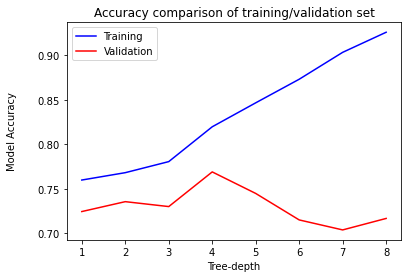

In [65]:
# Mean accuracy score for each value of max-depth
mean_train_score = np.mean(train_scores, axis=1) 
mean_val_score   = np.mean(valid_scores, axis=1)

plt.plot(max_depth_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(max_depth_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Tree-depth")
plt.ylabel("Model Accuracy", rotation=90, labelpad=20)
plt.title("Accuracy comparison of training/validation set")

The highest accuracy is observed when the tree-depth is four. From there on, the model overfits the data. This is notable because earlier we saw that exactly four factors accounted for 100% of the cumulative variance with four factors being redundant

Let's implement these settings then and run again

In [66]:
treeclf = DecisionTreeClassifier(max_depth=4)
treeclf.fit(Xtrain,ytrain)
print("Training accuracy: {}".format(accuracy_score(ytrain, treeclf.predict(Xtrain))))
print("Testing accuracy : {}".format(accuracy_score(ytest, treeclf.predict(Xtest))))

Training accuracy: 0.8175046554934823
Testing accuracy : 0.7316017316017316


Our final prediction model then, had an accuracy of 72.2% at predicting diabetes based on four features. 

In [67]:
y_pred = treeclf.predict(Xtest)
confusion_matrix(ytest,y_pred)
pd.crosstab(ytest, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,106,45,151
1,17,63,80
All,123,108,231


Text(0.5, 15.0, 'Predicted label')

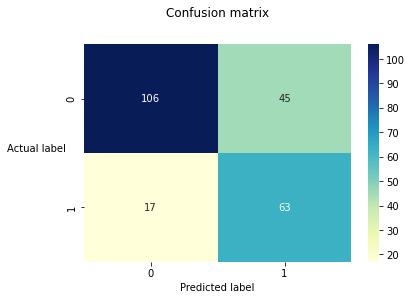

In [68]:
y_pred = treeclf.predict(Xtest)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label', rotation=0, labelpad=30)
plt.xlabel('Predicted label')

Looking at the above confusion matrix, we can see the top left is True Negatives (TN). Meaning that the model predicted the patient did not have diabetes and this was the case in reality. (107 counts). 
The model predicted the patient had diabetes and the patient did in fact have diabetes 61 times (True positives, TP). 
Total correct predictions = 168

The model also predicted diabetes erroneously in patients who did not have diabetes 44 times. (False positives, FN). And the model predicted no diabetes erroneously in patients who did in fact have diabetes 19 times (False negatives). 

Precision = TP / (TP + FP) 

Precision = 61 / 105 = 58%

Recall - The correct positive predictions made out of all possible positive predictions that could have been made

Recall = TP / (TP + FN)

Recall = 61 / 80 =  76%

F1 score - overall quality of prediction model 

F1 = 2*(Precision*Recall)/(Precision+Recall) = 2*(.58*.76)/(.58+.76) = 65%

### KNN Classifier prediction model without stratify

In [69]:
#no need to drop coloumns via this route
features = ['Pregnancies', 'Glucose', 'BloodPressure' , 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#Standard Scalar saved as ssc
ssc = StandardScaler()
#Notice capital X for training / testing data
X =  pd.DataFrame(ssc.fit_transform(data_clean_copy[features]), columns=features)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.678427,0.865108,-0.033518,0.710981,-0.143971,0.190034,0.634186,1.505314
1,-0.851320,-1.206162,-0.529859,-0.002011,-0.143971,-0.866673,-0.353080,-0.173111
2,1.290326,2.015813,-0.695306,-0.002011,-0.143971,-1.364835,0.795153,-0.084772
3,-0.851320,-1.074652,-0.529859,-0.715004,-0.601235,-0.640236,-1.011257,-1.056492
4,-1.157270,0.503458,-2.680669,0.710981,0.700209,1.624137,-0.299424,0.003566


In [70]:
y = data_clean_copy.Outcome

In [71]:
#importing train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)#, stratify=y)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(512, 8) (512,)
(256, 8) (256,)


In [72]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [73]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

print('Train score {} k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Train score 100.0 k = [1]


In [74]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Test score {} k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Test score 73.4375 k = [11]


C:\Users\Georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


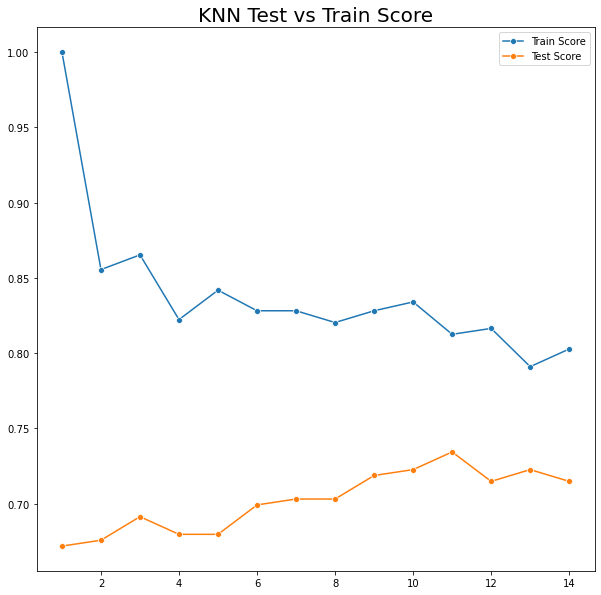

In [75]:
plt.figure(figsize=(10,10))
plt.title("KNN Test vs Train Score", size=20)
p = sb.lineplot(range(1,15), train_scores, marker='o', label='Train Score')
p = sb.lineplot(range(1,15), test_scores, marker='o', label='Test Score')

Looking at the graph we can see that the max test score is approximately 0.73 or 73%.

In [76]:
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.734375

In [77]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,136,34,170
1,34,52,86
All,170,86,256


Text(0.5, 15.0, 'Predicted label')

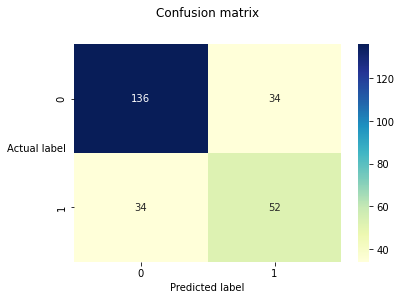

In [78]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label', rotation=0, labelpad=20)
plt.xlabel('Predicted label')

True positives = 52 

True negatives = 136

False positives = 34

False negatives = 34

Precision = TP / (TP+FP) = 52 / 86 = 60.4%

Recall = TP / (TP + FN) = 52 / 86 =  60.4%

F1 = 2*(Precision*Recall)/(Precision+Recall) = 2*(.604*.604)/(.604+.604) = 60.3%

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       170
           1       0.60      0.60      0.60        86

    accuracy                           0.73       256
   macro avg       0.70      0.70      0.70       256
weighted avg       0.73      0.73      0.73       256



In [80]:
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7682794329853153
Best Parameters: {'n_neighbors': 32}


## KNN Classifier prediciton model with stratify

In [81]:
#no need to drop coloumns via this route
features = ['Pregnancies', 'Glucose', 'BloodPressure' , 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

#Standard Scalar saved as ssc
ssc = StandardScaler()

#Notice capital X for training / testing data
X =  pd.DataFrame(ssc.fit_transform(data_clean_copy[features]), columns=features)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.678427,0.865108,-0.033518,0.710981,-0.143971,0.190034,0.634186,1.505314
1,-0.851320,-1.206162,-0.529859,-0.002011,-0.143971,-0.866673,-0.353080,-0.173111
2,1.290326,2.015813,-0.695306,-0.002011,-0.143971,-1.364835,0.795153,-0.084772
3,-0.851320,-1.074652,-0.529859,-0.715004,-0.601235,-0.640236,-1.011257,-1.056492
4,-1.157270,0.503458,-2.680669,0.710981,0.700209,1.624137,-0.299424,0.003566


In [82]:
y = data_clean_copy.Outcome

In [83]:
#importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(512, 8) (512,)
(256, 8) (256,)


In [84]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [85]:
# score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)

train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]

print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [86]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.953125 % and k = [9, 13]


C:\Users\Georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Georg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


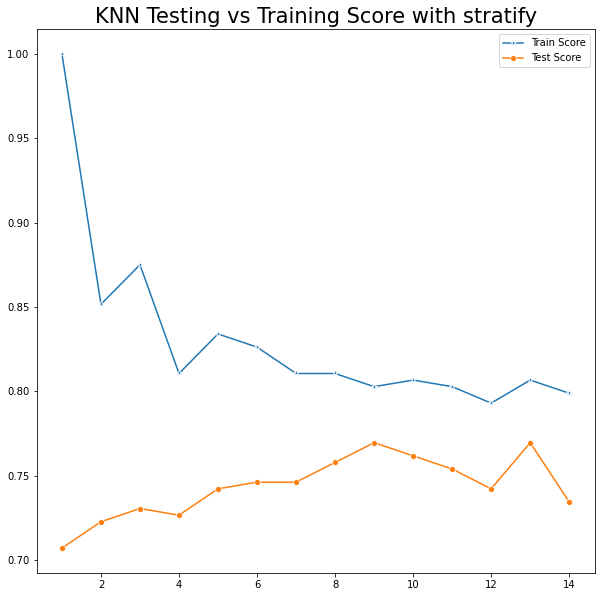

In [87]:
plt.figure(figsize=(10,10))
plt.title("KNN Testing vs Training Score with stratify", size=21)
p = sb.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sb.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [88]:
knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76953125

In [89]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,144,23,167
1,36,53,89
All,180,76,256


Text(0.5, 15.0, 'Predicted label')

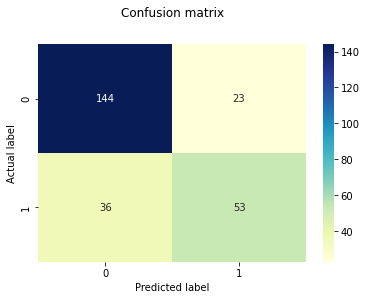

In [90]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

This confusion matrix shows us that the model predicted correctly people who are non-diabetic 144 times (True Negatives). It also predicted 53 times correctly people who are diabetic (True Positives). Moreover, it predicted 36 times someone who is diabetic as not diabetic (False Negatives). And 23 times, someone who is not diabetic as diabetic (False positives).

True positives = 53 

True negatives = 144

False positives = 23

False negatives = 36

Precision = TP / (TP+FP) = 53 / 76 = 69.7%

Recall = TP / (TP + FN) = 53 / 89 =  59.5%

F1 = 2*(Precision*Recall)/(Precision+Recall) = 2*(.697*.595)/(.697+.595) = 64%

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       167
           1       0.70      0.60      0.64        89

    accuracy                           0.77       256
   macro avg       0.75      0.73      0.74       256
weighted avg       0.76      0.77      0.76       256



In [92]:
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score: " + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 0.7682794329853153
Best Parameters: {'n_neighbors': 32}


### Conclusion

#### The data exploration findings made it clear that using stratify to perform a non-biased random train/test data sampling split was the optimal approach in building a Machine learning model compared to the non-stratify method. This can be seen by comparing the f1 score for both KNN Machine learning models, stratify having 64% and the non-stratify model having 60%, in the model implementation.

#### The stratify method shows that we had a total of 59 wrong predictions. In comparison, the other KNN method not implementing stratify had 68 wrong predictions showing us that stratify is applicable when initialising splitting training/testing results to get a better prediction after initial training/testing the data. We used 13 as the K-NN for stratifying to reach our optimal training/testing score of 0.76, while the optimal K-NN for the non-stratify method we used was 11 to get the score of 73. This shows that the model with stratifying is more accurate than the model without, thus showing importance in the way we randomly select our sample data to train/test with as it can have biases that interfere with getting the optimal result. However, this is overcome by using the KNN classifier and its hyperparameters to plot the initial query and find the neighbouring points to which we classify the training point according to the dominant label among the KNN. This, in turn, gave us an identical best score of 0.77 and best parameter of 32 n-neighbours to each KNN model regardless of it using stratify, showing us that optimising one’s machine learning model was more effective at gaining a better prediction score than focusing heavily on eliminating the bias nature of the random training/testing data sampling method.

#### For the decision tree model, we got an initial score of 0.66, to which we applied 10-fold cross-validation to increase the mean accuracy score for each depth. We went with a max depth of 4, giving us the best results before overfitting. This final result was 0.73 and resulted in 62 false predictions made by the machine model and an f1score of 65%. 

#### From this, it is clear that the decision tree and the 10-fold cross-validation gave us an f1 of 65% after optimising, while the others had an f1_score of 60% and 64%. This proves to show the effectiveness of the decision tree. However, we must note that the KNN hyperparameters tweaking left the decision tree well behind in terms of accuracy. It possibly shows that KNN classification is best on more straightforward datasets.




References

Healthline (29 June 2018) Do I Have Prediabetes or Diabetes?, Healthline, accessed 30 March 2022.
https://www.healthline.com/health/type-2-diabetes/a1c-fpgt-ogtt-tests